In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import pandasai as pai
from pandasai import Agent
import os

pai.clear_cache()
#here are 100 free requests/month that are provided with BambooLLM
os.environ["PANDASAI_API_KEY"] = os.environ.get('PANDASAI_API_KEY')

In [5]:
df = pd.read_csv('responses.csv')

In [7]:
agent = Agent(df)

# Detekcija autlajera

In [9]:
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


C:\Users\kocha\AppData\Local\Temp\ipykernel_24552\1292589342.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], data=df, y='Height', palette='Spectral')
C:\Users\kocha\AppData\Local\Temp\ipykernel_24552\1292589342.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[2], data=df, y='Weight', palette='Spectral')


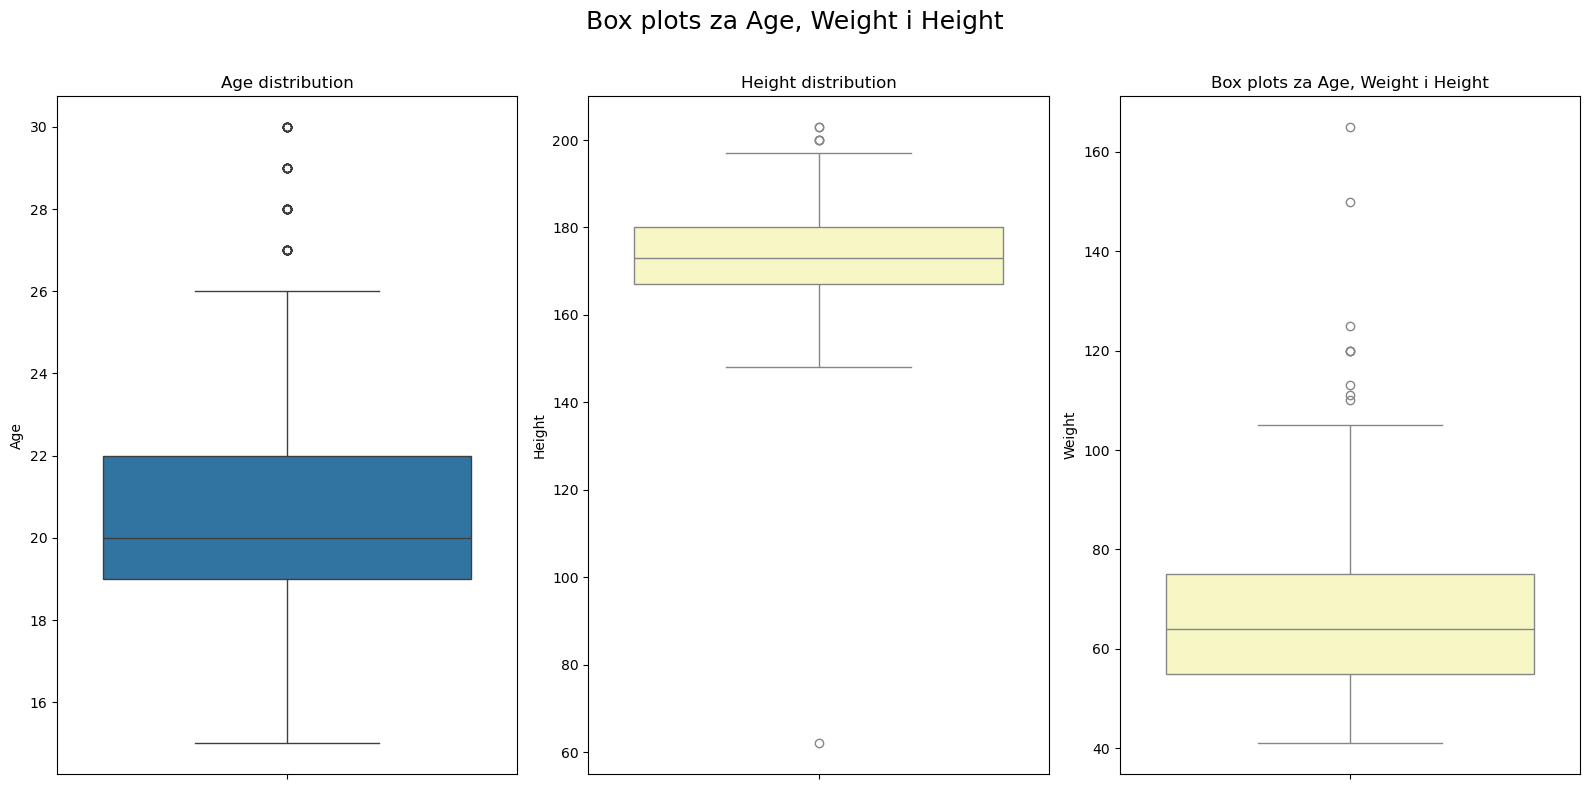

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16,8))
fig.suptitle('Box plots za Age, Weight i Height\n', size = 18)

sns.boxplot(ax=axes[0], data=df, y='Age')
axes[0].set_title("Age distribution");

sns.boxplot(ax=axes[1], data=df, y='Height', palette='Spectral')
axes[1].set_title("Height distribution");

sns.boxplot(ax=axes[2], data=df, y='Weight', palette='Spectral')
axes[2].set_title("Box plots za Age, Weight i Height");

plt.tight_layout()

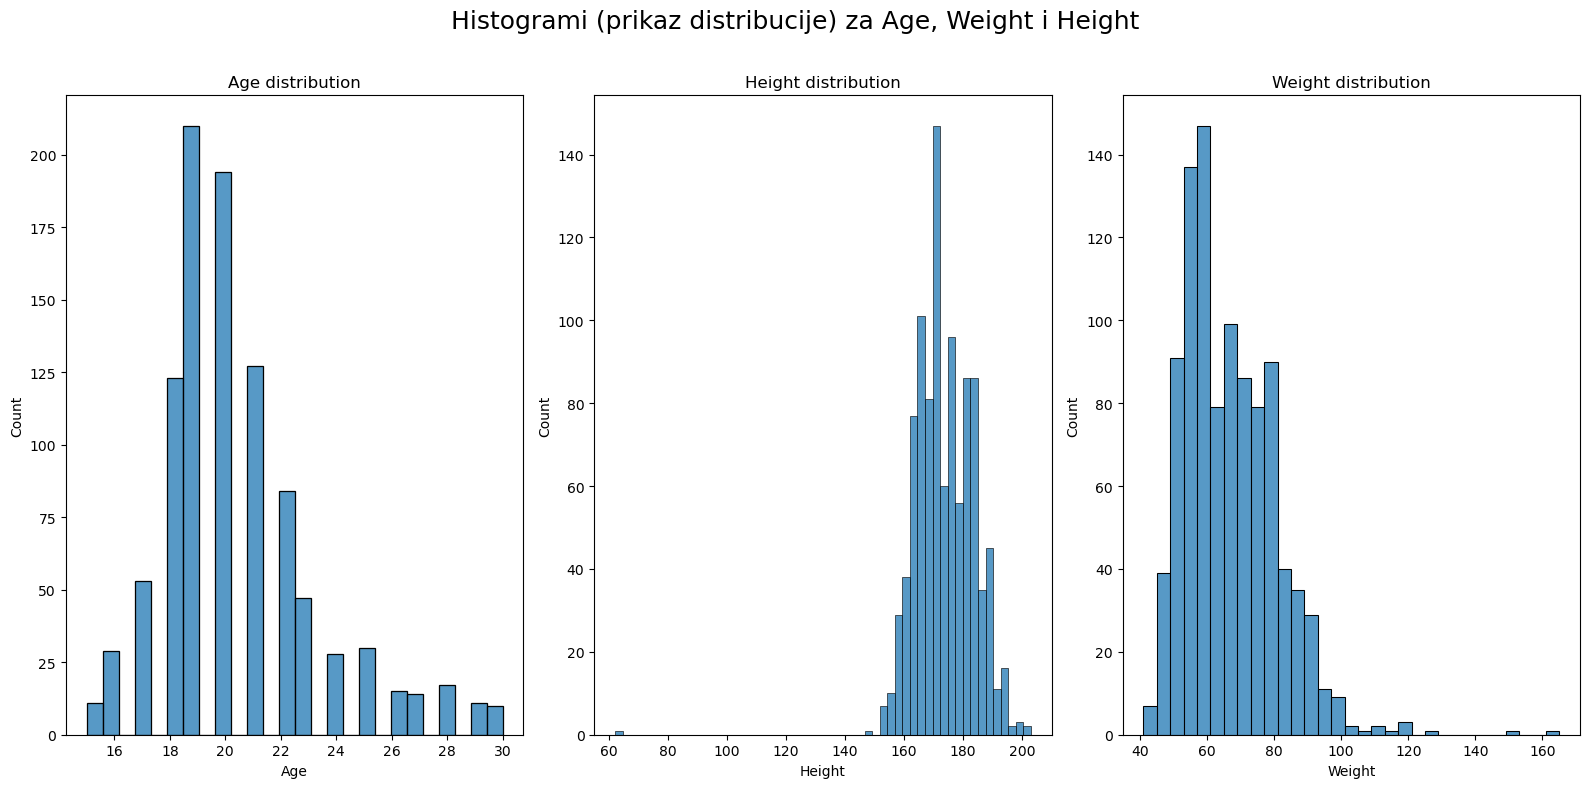

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16,8))
fig.suptitle('Histogrami (prikaz distribucije) za Age, Weight i Height\n', size = 18)

sns.histplot(ax=axes[0], data=df, x="Age", multiple="dodge")
axes[0].set_title("Age distribution");

sns.histplot(ax=axes[1], data=df, x="Height", multiple="dodge")
axes[1].set_title("Height distribution");

sns.histplot(ax=axes[2], data=df, x="Weight", multiple="dodge")
axes[2].set_title("Weight distribution");

plt.tight_layout()

#### Prikazujemo sve autlajere po atributu Height

In [15]:
agent.chat('Find outliers for height. List their index and height.')

C:\Users\kocha\AppData\Local\Temp\ipykernel_24552\975134214.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  agent.chat('Find outliers for height. List their index and height.')
C:\Users\kocha\AppData\Local\Temp\ipykernel_24552\975134214.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  agent.chat('Find outliers for height. List their index and height.')
C:\Users\kocha\AppData\Local\Temp\ipykernel_24552\975134214.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

,index,height
0,97,200.0
1,220,200.0
2,547,203.0
3,676,62.0
4,799,203.0
5,992,200.0


In [19]:
df.sort_values('Height')['Height']

676      62.0
78      148.0
268     152.0
928     153.0
1000    153.0
        ...  
885       NaN
902       NaN
939       NaN
960       NaN
964       NaN
Name: Height, Length: 1010, dtype: float64

In [27]:
df.sort_values('Height',ascending=False)['Height']

799    203.0
547    203.0
992    200.0
97     200.0
220    200.0
       ...  
885      NaN
902      NaN
939      NaN
960      NaN
964      NaN
Name: Height, Length: 1010, dtype: float64

#### Prikazujemo sve autlajere po sva tri atributa.
#### Atributi se razmatraju odvojeno. Red će biti prikazan ako je autlajer bar po jednom od atributa.

In [33]:
result_df = agent.chat('Find outliers for age, height, and weight. List their index age, height and weight.')

In [45]:
result_df.sort_values('Height',ascending=False)

,Index,Age,Height,Weight
45,799,18.0,203.0,89.0
26,547,21.0,203.0,80.0
3,97,19.0,200.0,75.0
60,992,30.0,200.0,150.0
7,220,18.0,200.0,90.0
...,...,...,...,...
36,677,28.0,164.0,77.0
13,392,30.0,160.0,47.0
5,191,29.0,160.0,67.0
35,676,20.0,62.0,55.0


In [47]:
result_df.sort_values('Weight',ascending=False)

,Index,Age,Height,Weight
53,885,23.0,NaN,165.0
60,992,30.0,200.0,150.0
52,859,20.0,190.0,125.0
57,973,20.0,175.0,120.0
42,793,24.0,185.0,120.0
...,...,...,...,...
54,898,28.0,172.0,54.0
58,989,30.0,168.0,54.0
2,72,28.0,168.0,52.0
23,530,28.0,172.0,50.0


In [ ]:
agent.chat('Find all the outliers for age, height, and weight. Use the Isolation Forest method. List the index, age, height, weight. Return the result as data frame.')

C:\Users\kocha\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,Age,Height,Weight
222,24.0,153.000000,42.0
392,30.0,160.000000,47.0
461,29.0,189.000000,96.0
715,29.0,183.000000,111.0
793,24.0,185.000000,120.0
796,27.0,189.000000,113.0
844,30.0,184.000000,78.0
859,20.0,190.000000,125.0
885,23.0,173.514141,165.0
992,30.0,200.000000,150.0


C:\Users\kocha\AppData\Local\Temp\ipykernel_24552\2082530982.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  agent.chat('Find outliers for height for weight. Make a scatter plot for height and weight. Color the outliers in red.')
C:\Users\kocha\AppData\Local\Temp\ipykernel_24552\2082530982.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  agent.chat('Find outliers for height for weight. Make a scatter plot for height and weight. Color the outliers in red.')
C:\Users\kocha\AppData\Local\Temp\ipykernel_24552\2082530982.py:2:

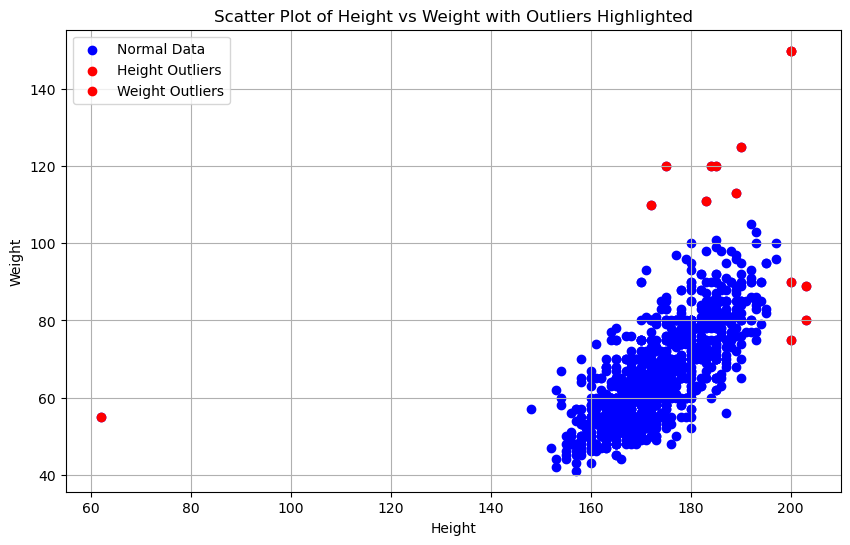

Traceback (most recent call last):
  File "C:\Users\kocha\anaconda3\Lib\site-packages\pandasai\pipelines\chat\generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "C:\Users\kocha\anaconda3\Lib\site-packages\pandasai\pipelines\pipeline.py", line 137, in run
    raise e
  File "C:\Users\kocha\anaconda3\Lib\site-packages\pandasai\pipelines\pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "C:\Users\kocha\anaconda3\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 133, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
                                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kocha\anaconda3\Lib\site-packages\pandasai\responses\response_serializer.py", line 35, in serialize
    with open(result["value"], "rb") as image_file:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or dire

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: 'C:/Users/kocha/Dropbox/nastava/Data_Mining/2020_21/Python_primeri/Data_wrangling/svi_primeri_zajedno/exports/charts/temp_chart.png'\n"

In [51]:
agent = Agent(df)
agent.chat('Find outliers for height for weight. Make a scatter plot for height and weight. Color the outliers in red.')

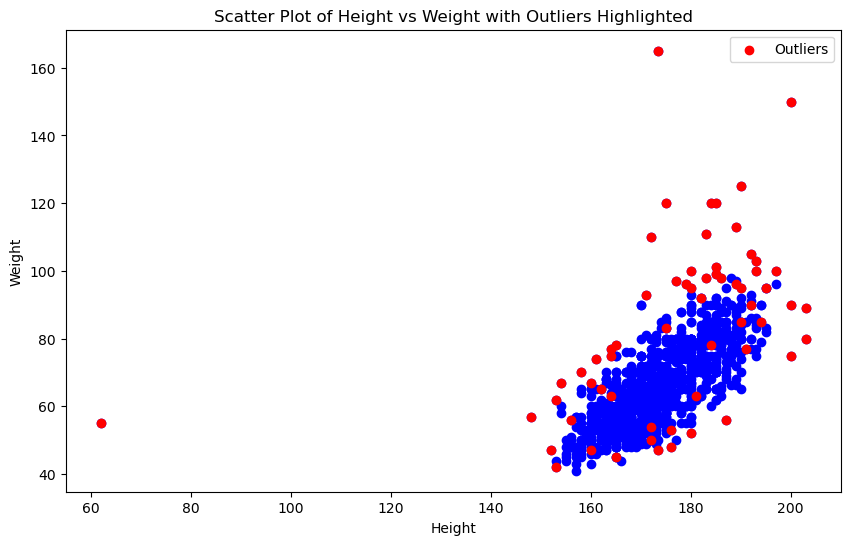

Traceback (most recent call last):
  File "C:\Users\kocha\anaconda3\Lib\site-packages\pandasai\pipelines\chat\generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "C:\Users\kocha\anaconda3\Lib\site-packages\pandasai\pipelines\pipeline.py", line 137, in run
    raise e
  File "C:\Users\kocha\anaconda3\Lib\site-packages\pandasai\pipelines\pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "C:\Users\kocha\anaconda3\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 133, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
                                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kocha\anaconda3\Lib\site-packages\pandasai\responses\response_serializer.py", line 35, in serialize
    with open(result["value"], "rb") as image_file:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or dire

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: 'C:/Users/kocha/Dropbox/nastava/Data_Mining/2020_21/Python_primeri/Data_wrangling/svi_primeri_zajedno/exports/charts/temp_chart.png'\n"

In [95]:
pai.clear_cache()
agent.chat('Find all the outliers for age, height, and weight. Use the dbscan method. Make a scatter plot for height and weight. Color the outliers in red.')